# <img style="float: left; padding-right: 10px; width: 45px" src="style/iacs.png"> S-109A Introduction to Data Science: 

## Homework 2: Linear and k-NN Regression


**Harvard University**<br/>
**Summer 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">


### INSTRUCTIONS

- To submit your assignment follow the instructions given in Classroom.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

Names of people you have worked with goes here: 



<hr style="height:2pt">

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

<div class="theme"> Main Theme: Predicting Taxi Pickups in NYC </div>

In this homework, we will explore k-nearest neighbor and linear regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in the file `dataset_1.csv`.  You will need to separate it into training and test sets. The first column contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded in NYC during Jan 2015.

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pickups at that time. The models will be fitted to the training set and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric.

<div class="exercise"> <b> Question 1 [10 pts]</b> </div>

**1.1**. Use pandas to load the dataset from the csv file `dataset_1.csv` into a pandas data frame.  Use the `train_test_split` method from `sklearn` with a `random_state` of 42 and a `test_size` of 0.2 to split the dataset into training and test sets.  Store your train set dataframe in the variable `train_data`.  Store your test set dataframe in the variable `test_data`.


**1.2**. Generate a scatter plot of the training data points with well-chosen labels on the x and y axes. The time of the day should be on the x-axis and the number of taxi pickups on the y-axis.  Make sure to title your plot.

**1.3**. Does the pattern of taxi pickups make intuitive sense to you? 


### Answers

**1.1**

In [2]:
## Code here

df = pd.read_csv('data/dataset_1.csv')
train_data, test_data = train_test_split(
    df,
    test_size=0.2,
    random_state=42
)
X_train = train_data.to_numpy()[:, 0, np.newaxis]
X_test = test_data.to_numpy()[:, 0, np.newaxis]
y_train = train_data.to_numpy()[:, 1]
y_test = test_data.to_numpy()[:, 1]
print(len(X_train), len(X_test))

1000 250


**1.2**

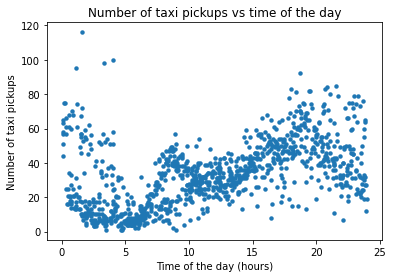

In [3]:
## Code for your plot here

plt.scatter(X_train/60, y_train, s=20, linewidths=0)
plt.title('Number of taxi pickups vs time of the day')
plt.xlabel('Time of the day (hours)')
plt.ylabel('Number of taxi pickups')
plt.show()

**1.3**

**Does the pattern of taxi pickups make intuitive sense to you?**

The pattern of taxi pickups makes sense, because:
- Many pickups occur between 8:00 and 00:00, that is, the time people are going to work, are working or going home;
- There're some peaks (not constantly) beetween 00:00 and 5:00, time of the day when there's less people on the streets and people feel afraid;
- Between 5:00 and 8:00, we see less pickups, because people are resting.

<div class="exercise"> <b>Question 2 [20 pts]</b> </div>

In lecture we've seen k-Nearest Neighbors (k-NN) Regression, a non-parametric regression technique.  In the following problems please use built-in functionality from `sklearn` to run k-NN Regression. 


**2.1**. Choose `TimeMin` as your predictor variable (aka, feature) and `PickupCount` as your response variable.  Create a dictionary of `KNeighborsRegressor` objects and call it `KNNModels`.  Let the key for your `KNNmodels` dictionary be the value of $k$ and the value be the corresponding `KNeighborsRegressor` object. For $k \in \{1, 10, 75, 250, 500, 750, 1000\}$, fit k-NN regressor models on the training set (`train_data`). 

**2.2**.  For each $k$ on the training set, overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` with a scatter plot of predicted `PickupCount` vs `TimeMin`.  Do the same for the test set.  You should have one figure with 2 x 7 total subplots; for each $k$ the figure should have two subplots, one subplot for the training set and one for the test set. 

**Hints**:
1. In each subplot, use two different colors and/or markers to distinguish k-NN regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)


**2.3**. Report the $R^2$ score for the fitted models on both the training and test sets for each $k$.

**Hints**:
1. Reporting the $R^2$ values in tabular form is encouraged.
2. You should order your reported $R^2$ values by $k$.

**2.4**. Plot the $R^2$ values from the model on the training and test set as a function of $k$ on the same figure.  

**Hints**:
1. Again, the figure must have axis labels and a legend.
2. Differentiate $R^2$ visualization on the training and test set by color and/or marker.
3. Make sure the $k$ values are sorted before making your plot.

**2.5**. Discuss the results:

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
2. What does an $R^2$ score of $0$ mean?  
3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?
4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  
5. How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?
6. What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?

### Answers

**2.1**

In [4]:
## Code here

KNNmodels = {}
for key in [1, 10, 75, 250, 500, 750, 1000]:
    regressor = KNeighborsRegressor(n_neighbors=key)
    regressor.fit(X_train, y_train)
    KNNmodels.update({key: regressor})

**2.2**

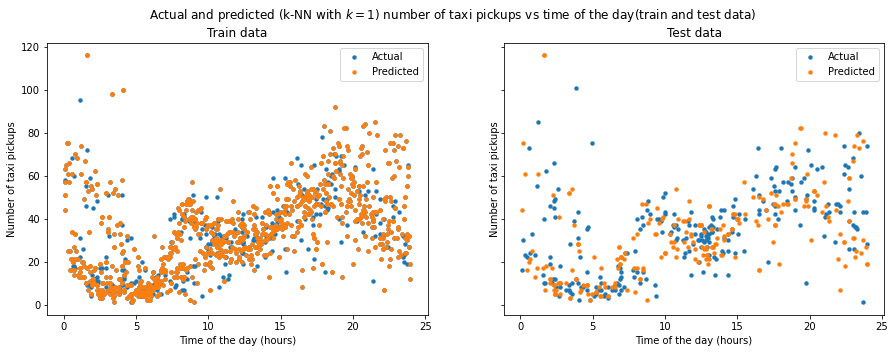

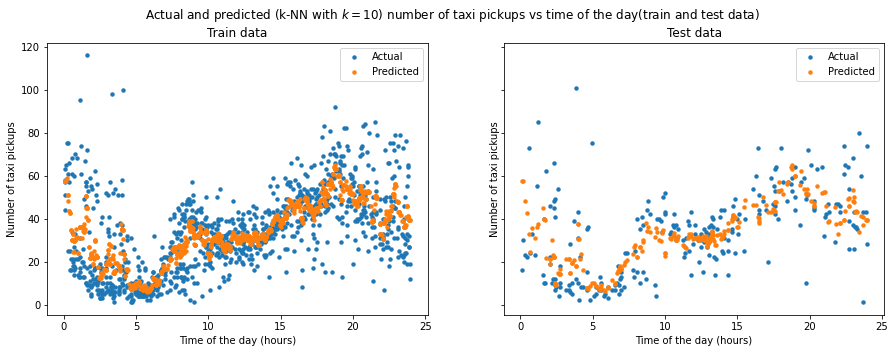

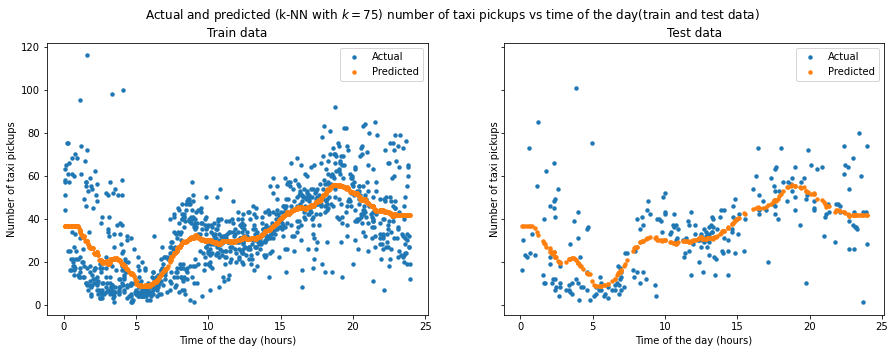

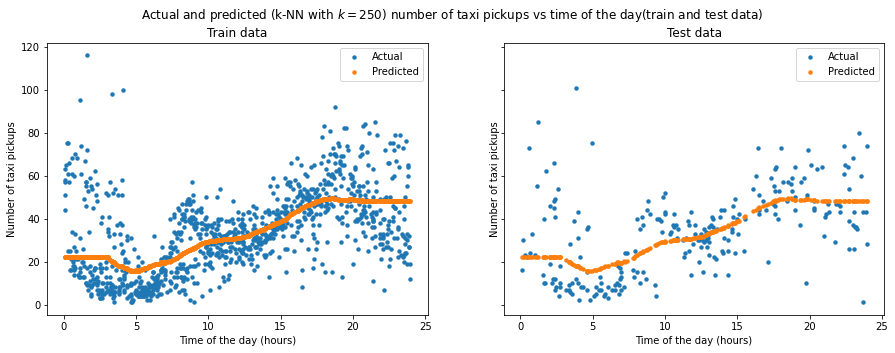

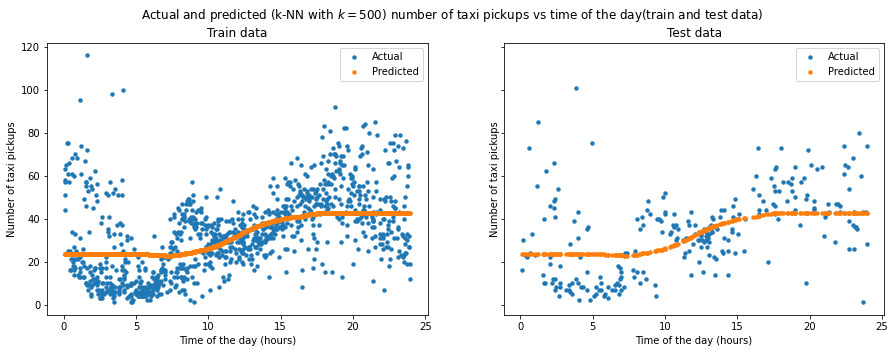

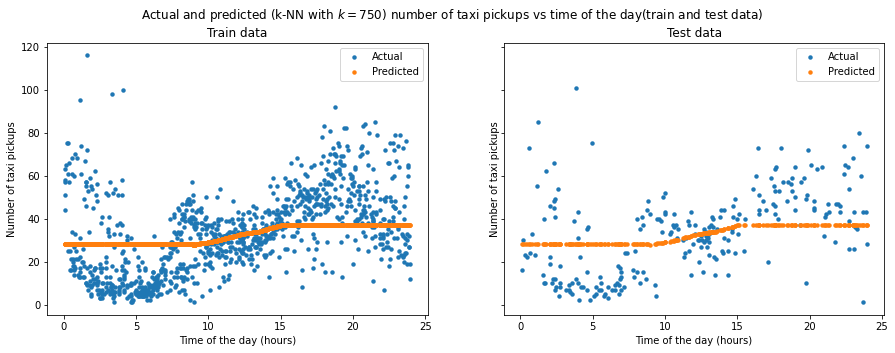

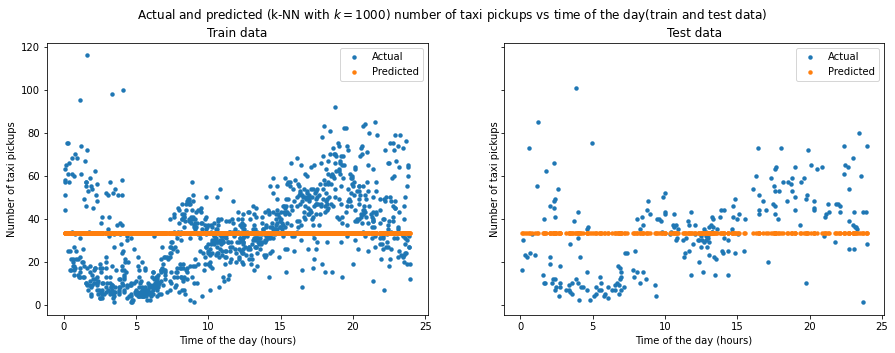

In [5]:
## Code for your plot here

for key in [1, 10, 75, 250, 500, 750, 1000]:
    regressor = KNNmodels[key]
    fig, axes = plt.subplots(
        1,
        2,
        figsize=(15, 5),
        sharex=True,
        sharey=True
    )
        
    fig.suptitle(
        ('Actual and predicted (k-NN with $k = {}$) '
        + 'number of taxi pickups vs time of the day'
        + '(train and test data)').format(key)
    )
    
    axes[0].scatter(
        X_train/60,
        y_train, s=20,
        linewidths=0,
        label='Actual'
    )
    axes[0].scatter(
        X_train/60,
        regressor.predict(X_train),
        s=20,
        linewidths=0,
        label='Predicted'
    )
    axes[0].set_xlabel('Time of the day (hours)')
    axes[0].set_ylabel('Number of taxi pickups')
    axes[0].set_title('Train data')
    axes[0].legend()
    
    axes[1].scatter(
        X_test/60,
        y_test, s=20,
        linewidths=0,
        label='Actual'
    )
    axes[1].scatter(
        X_test/60,
        regressor.predict(X_test),
        s=20,
        linewidths=0,
        label='Predicted'
    )
    axes[1].set_xlabel('Time of the day (hours)')
    axes[1].set_ylabel('Number of taxi pickups')
    axes[1].set_title('Test data')
    axes[1].legend()
    
    plt.show()

**2.3**

In [6]:
## Code here

table = []
for key in [1, 10, 75, 250, 500, 750, 1000]:
    regressor = KNNmodels[key]
    r2_train = r2_score(y_train, regressor.predict(X_train))
    r2_test = r2_score(y_test, regressor.predict(X_test))
    table.append([key, r2_train, r2_test])
    
r2 = pd.DataFrame(table, columns=['k', 'r2_train', 'r2_test'])
r2

,k,r2_train,r2_test
0,1,0.712336,-0.418932
1,10,0.509825,0.272068
2,75,0.445392,0.390310
3,250,0.355314,0.340341
4,500,0.290327,0.270321
5,750,0.179434,0.164909
6,1000,0.000000,-0.000384


**2.4**

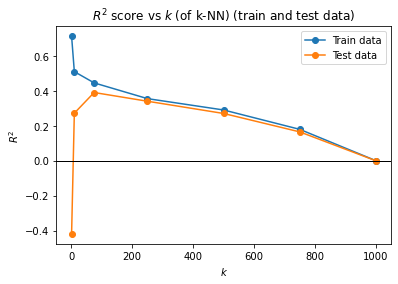

In [7]:
## Code for your plot here

plt.plot(r2.k, r2.r2_train, marker='o', label='Train data')
plt.plot(r2.k, r2.r2_test, marker='o', label='Test data')
plt.axhline(0, c='black', linewidth=1)
plt.legend()
plt.xlabel('$k$')
plt.ylabel('$R^2$')
plt.title('$R^2$ score vs $k$ (of k-NN) (train and test data)')
plt.show()

**2.5**

**Discuss the results**


1. *If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?*  

    For any point, all the $k = n$ observations will be used to compute the mean. So, for all possible points for the feature (between the extremities, of course) it will result in the same number: the mean of all observations. Look at the result of k-NN with $k = 1000$ on train data. All points have the same number of taxi pickups prediction, because there are $1000$ observations in the train data.
    
    
2. *What does an $R^2$ score of $0$ mean?*

    $R^2$ is defined as $R^2 = 1 - \dfrac{\sum_i (\hat{y}_i - y_i)^2}{\sum_i (\overline{y} - y_i)^2}$, where $y_i$ is the actual value, $\hat{y}_i$ is the predicted value and $\overline{y}$ is the mean of the observations. So, $R^2 = 0$ means that $\sum_i (\hat{y}_i - y_i)^2 = \sum_i (\overline{y} - y_i)^2$, that is, our model is as good as the mean. We achieved this with $k = 1000$ in the train data.
    

3. *What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?*

    It would mean $\sum_i (\hat{y}_i - y_i)^2 > \sum_i (\overline{y} - y_i)^2$, that is, our model is worse than the mean. We achieved this on test data, with $k = 1, 1000$.
    
       
4. *Do the training and test $R^2$ plots exhibit different trends?  Describe.*  

    With big values of $k$, starting with 75, training and test $R^2$ tend to converge to each other, that is, they exhibit the same trend.
    
        
5. *How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?*

    Train and test data have different results.
    - **Train data**. $k$ affects the fitted model in a negative way: the more $k$, the less $R^2$.
    - **Test data**. For very low values of $k$ ($< 10$), we have low (a few negative) values. $R^2$ has a peak closer to $k = 75$ (its value is closer to $R^2$ for train data too) and , increasing $k$, it starts to decrease togheter with $R^2$ for train data.
    
    
6. *What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?*

    We cannot evaluate our model on train data, because it was fitted to this. So we have to evaluate on test data. So, on test data, the best $R^2$ is that of $k = 75$, with $R^2 \approx 0.39$. On train data it was $R^2 \approx 0.45$.
    

<div class="exercise"> <b> Question 3  [20 pts] </b></div>

We next consider simple linear regression for the same train-test data sets, which we know from lecture is a parametric approach for regression that assumes that the response variable has a linear relationship with the predictor.  Use the `statsmodels` module for Linear Regression. This module has built-in functions to summarize the results of regression and to compute confidence intervals for estimated regression parameters.  

**3.1**. Again choose `TimeMin` as your predictor variable and `PickupCount` as your response variable.  Create a `OLS` class instance and use it to fit a Linear Regression model on the training set (`train_data`).  Store your fitted model in the variable `OLSModel`.

**3.2**. Re-create your plot from 2.2 using the predictions from `OLSModel` on the training and test set. You should have one figure with two subplots, one subplot for the training set and one for the test set.

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)


**3.3**. Report the $R^2$ score for the fitted model on both the training and test sets.  You may notice something peculiar about how they compare.

**3.4**. Report the slope and intercept values for the fitted linear model.  

**3.5**. Report the $95\%$ confidence interval for the slope and intercept.

**3.6**. Create a scatter plot of the residuals ($e = y - \hat{y}$) of the linear regression model on the training set as a function of the predictor variable (i.e. `TimeMin`). Place on your plot a horizontal line denoting the constant zero residual.  

**3.7**. Discuss the results:

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?
2. What does the sign of the slope of the fitted linear model convey about the data?  
3. Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?  
4. Do you expect a $99\%$ confidence interval for the slope and intercept to be tighter or looser than the $95\%$ confidence intervals? Briefly explain your answer.  
5. Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.

### Answers

**3.1**

In [8]:
## Code here

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

OLSModel = sm.OLS(y_train, X_train)
OLSModel = OLSModel.fit();

**3.2**

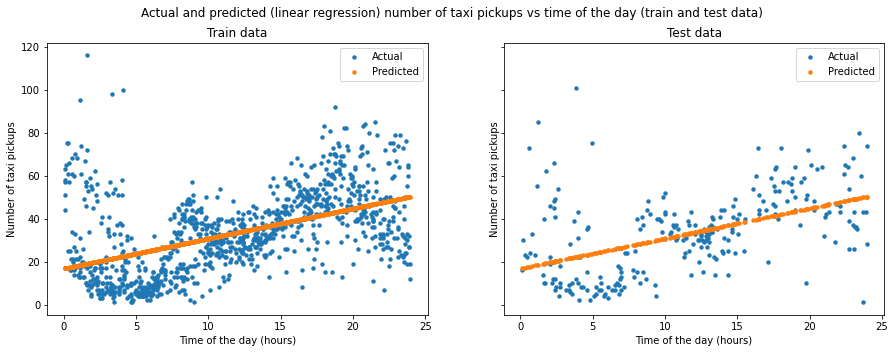

In [9]:
## Code for your plot here

regressor = OLSModel
fig, axes = plt.subplots(
    1,
    2,
    figsize=(15, 5),
    sharex=True,
    sharey=True
)

fig.suptitle('Actual and predicted (linear regression)'
             + ' number of taxi pickups vs time of the'
             + ' day (train and test data)')

axes[0].scatter(
    X_train[:, 1]/60,
    y_train,
    s=20,
    linewidths=0,
    label='Actual'
)
axes[0].scatter(
    X_train[:, 1]/60,
    regressor.predict(X_train),
    s=20,
    linewidths=0,
    label='Predicted'
)
axes[0].set_xlabel('Time of the day (hours)')
axes[0].set_ylabel('Number of taxi pickups')
axes[0].set_title('Train data')
axes[0].legend()

axes[1].scatter(
    X_test[:, 1]/60,
    y_test,
    s=20,
    linewidths=0,
    label='Actual'
)
axes[1].scatter(
    X_test[:, 1]/60,
    regressor.predict(X_test),
    s=20,
    linewidths=0,
    label='Predicted'
)
axes[1].set_xlabel('Time of the day (hours)')
axes[1].set_ylabel('Number of taxi pickups')
axes[1].set_title('Test data')
axes[1].legend()

plt.show()

**3.3**

In [10]:
## Code here

# The both R² are very close
print('Train data: R² = {}'.format(r2_score(
    y_train,
    regressor.predict(X_train)
)))
print('Test data:  R² = {}'.format(r2_score(
    y_test,
    regressor.predict(X_test)
)))

Train data: R² = 0.24302603531893352
Test data:  R² = 0.240661535615741


**3.4**

In [11]:
## Code here

beta_0, beta_1 = regressor.params
print(('Intercept and slope are {:.4f} and {:.4f}, '
      + 'respectively.').format(beta_0, beta_1))

Intercept and slope are 16.7506 and 0.0233, respectively.


**3.5**

In [12]:
## Code here

confs = regressor.conf_int(1 - 0.95)
print(('The 95% confidence interval for the intercept '
      + 'is ({:.4f}, {:.4f}).').format(confs[0, 0], confs[0, 1]))
print(('The 95% confidence interval for the slope is '
      + '({:.4f}, {:.4f}).').format(confs[1, 0], confs[1, 1]))

The 95% confidence interval for the intercept is (14.6751, 18.8261).
The 95% confidence interval for the slope is (0.0208, 0.0259).


**3.6**

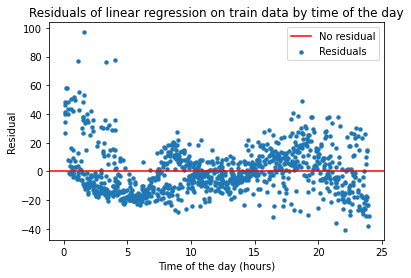

In [13]:
## Code here

residuals = y_train - regressor.predict(X_train)
plt.scatter(
    X_train[:, 1]/60,
    residuals, s=20,
    linewidths=0,
    label='Residuals'
)
plt.axhline(0, c='red', label='No residual')
plt.legend()
plt.xlabel('Time of the day (hours)')
plt.ylabel('Residual')
plt.title('Residuals of linear regression on train data'
          + ' by time of the day')
plt.show()

**3.7**

**Discuss the results**

1. *How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?*

    The test $R^2$ score ($\approx 0.24$) is less than the best test $R^2$ score from k-NN regression ($\approx 0.39$).
    

2. *What does the sign of the slope of the fitted linear model convey about the data?* 

    The slope is positive, so it conveys that people tend to pickup more taxis by the end of the day than in the beggining of it.
    

3. *Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?*  
    
    The intervals are quite small, so the estimates of the model parameters are quite reliable.
    

4. *Do you expect a $99\%$ confidence interval for the slope and intercept to be tighter or looser than the $95\%$ confidence intervals? Briefly explain your answer.*  

    Before observing a 95% confidence interval, it means an interval which we should see the parameters 95% of the time. If we are asking a 99% confidence interval, for the same parameters, it should be looser, to increase this probability. All of this before observation. So we observe it and have looser confidence intervals.
    

5. *Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.*

    The residuals seems not to have the same distribution (look at the differences between midnight and midday), so we can think that linearity is not valid for this dataset.


<div class="exercise">  <b> Question 4 [20 pts]: Roll Up Your Sleeves Show Some Class </b> </div>

We've seen Simple Linear Regression in action and we hope that you're convinced it works.  In lecture we've thought about the mathematical basis for Simple Linear Regression.  There's no reason that we can't take advantage of our knowledge to create our own implementation of Simple Linear Regression.  We'll provide a bit of a boost by giving you some basic infrastructure to use.  In the last problem, you should have heavily taken advantage of the `statsmodels` module.  In this problem we're going to build our own machinery for creating Linear Regression models and in doing so we'll follow the `statsmodels` API pretty closely.  Because we're following the `statmodels` API, we'll need to use python classes to create our implementation.  If you're not familiar with python classes don't be alarmed.  Just implement the requested functions/methods in the CS109OLS class that we've given you below and everything should just work.  If you have any questions, ask the teaching staff.

**4.1**. Implement the `fit` and `predict` methods in the CS109OLS class we've given you below as well as the `CS109r2score` function that we've provided outside the class.

**Hints**:

1. `fit` should take the provided numpy arrays `endog` and `exog` and use the normal equations to calculate the optimal linear regression coefficients.  Store those coefficients in self.params
2. In `fit` you'll need to calculate an inverse.  Use np.linalg.pinv
3. `predict` should use the numpy array stored in self.exog and calculate an np.array of predicted values.
4. `CS109r2score` should take the true values of the response variable `y_true` and the predicted values of the response variable `y_pred` and calculate and return the $R^2$ score. 
5.  To replicate the statsmodel API your code should be able to be called as follows:
    ```python
    mymodel = CS109OLS(y_data, augmented_x_data)
    mymodel.fit()
    predictions = mymodel.predict()
    R2score = CS109r2score(true_values, predictions)
    ```

**4.2**. As in 3.1 create a `CS109OLS` class instance and  fit a Linear Regression model on the training set (`train_data`).  Store your model in the variable `CS109OLSModel`.  Remember that as with sm.OLS your class should assume you want to fit an intercept as part of your linear model (so you may need to add a constant column to your predictors).

**4.3**  As in 3.2 Overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` on the training set with a scatter plot of `PickupCount` vs predictions of `TimeMin` from your `CS109OLSModel` Linear Regression model on the training set.  Do the same for the test set.  You should have one figure with two subplots, one subplot for the training set and one for the test set.  How does your figure compare to that in 3.2?

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)

**4.4**. As in 3.3, report the $R^2$ score for the fitted model on both the training and test sets using your `CS109OLSModel`.  Make sure to use the `CS109r2score` that you created.  How do the results compare to the the scores in 3.3?

**4.5**. as in 3.4, report the slope and intercept values for the fitted linear model your `CS109OLSModel`.   How do the results compare to the the values in 3.4?




### Answers

**4.1**

In [14]:
class CS109OLS(object):
    
    def __init__(self, endog = [], exog = []):
        
        ## Make sure you initialize self.params
        self.params = []
              
        ## store exog and endog in instance variables
        self.endog = np.array(endog)
        self.exog = np.array(exog)
  
                    
    def fit(self):
        
        #################
        # Your Code below
        #################
        
        # do something with self.exog and self.endog to calculate 
        # your linear regression coefficients
        # store the result in self.params
        
        Y, X = self.endog, self.exog
        Xt = np.transpose(X)
        XtX = np.matmul(Xt, X)
        XtXinv = np.linalg.pinv(XtX)
        XtXinvXt = np.matmul(XtXinv, Xt)
        Beta = np.matmul(XtXinvXt, Y)
        self.params = list(Beta)
        
        return self
            
    def predict(self, X=None):
        
        # check if the linear regression coefficients have been calculated
        if not np.array(self.params).size:
            raise(Exception("fit() has not been called on OLS Model!"))
        
        #################
        # Your Code below
        #################
        
        # calculate your predictions based upon exog/self.exog and return them
        # as a numpy array
        
        if X is None:
            return np.matmul(self.exog, np.array(self.params))
        return np.matmul(X, np.array(self.params))
        
        
def CS109r2score(y_true, y_pred):
    
    #################
    # Your Code below
    #################
    
    # y_true should be your actual y data (endogenous data)
    # y_pred should be the corresponding predictions from your model
    
    # calculate the r^2 score an return it
    
    se_1 = y_pred - y_true
    se_1 = se_1**2
    se_1 = np.sum(se_1)
    
    se_2 = np.mean(y_true) - y_true
    se_2 = se_2**2
    se_2 = np.sum(se_2)
    
    r2 = 1 - se_1/se_2
    
    return r2

**4.2**

In [15]:
## Code here

CS109OLSModel = CS109OLS(y_train, X_train)
CS109OLSModel.fit();

**4.3**

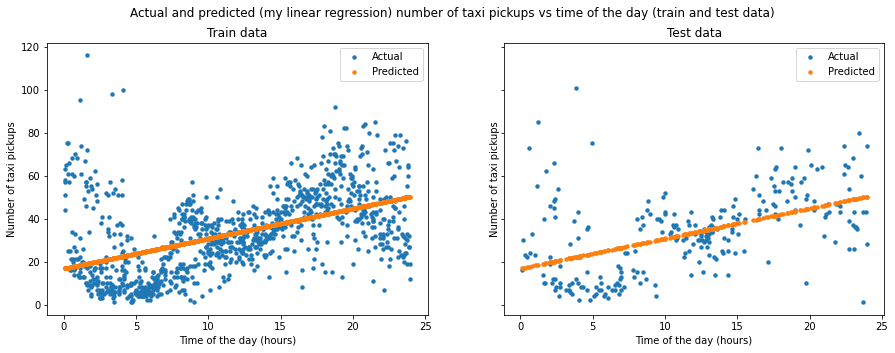

In [16]:
## Code for your plot here

regressor = CS109OLSModel
fig, axes = plt.subplots(
    1,
    2,
    figsize=(15, 5),
    sharex=True,
    sharey=True
)

fig.suptitle('Actual and predicted (my linear regression) '
             + 'number of taxi pickups vs time of the day '
             + '(train and test data)')

axes[0].scatter(
    X_train[:, 1]/60,
    y_train,
    s=20,
    linewidths=0,
    label='Actual'
)
axes[0].scatter(
    X_train[:, 1]/60,
    regressor.predict(),
    s=20,
    linewidths=0,
    label='Predicted'
)
axes[0].set_xlabel('Time of the day (hours)')
axes[0].set_ylabel('Number of taxi pickups')
axes[0].set_title('Train data')
axes[0].legend()

axes[1].scatter(
    X_test[:, 1]/60,
    y_test,
    s=20,
    linewidths=0,
    label='Actual'
)
axes[1].scatter(
    X_test[:, 1]/60,
    regressor.predict(X_test),
    s=20,
    linewidths=0,
    label='Predicted'
)
axes[1].set_xlabel('Time of the day (hours)')
axes[1].set_ylabel('Number of taxi pickups')
axes[1].set_title('Test data')
axes[1].legend()

plt.show()

This figure and the one in 3.2 are identical.

**4.4**

In [17]:
## Code here

print('Train data: R² = {}'.format(CS109r2score(
    y_train,
    regressor.predict()
)))
print('Test data:  R² = {}'.format(CS109r2score(
    y_test,
    regressor.predict(X_test)
)))

Train data: R² = 0.24302603531893352
Test data:  R² = 0.2406615356157339


Note that these $R^2$ scores are the same of that in 3.3.

In [18]:
# They're pretty close:

print(CS109r2score(y_train, regressor.predict())
      - r2_score(y_train, OLSModel.predict(X_train)))
print(CS109r2score(y_test, regressor.predict(X_test))
      - r2_score(y_test, OLSModel.predict(X_test)))

0.0
-7.105427357601002e-15


**4.5**

In [19]:
## Code here

beta_0, beta_1 = regressor.params
print(('Intercept and slope are {:.4f} and {:.4f}, '
      + 'respectively.').format(beta_0, beta_1))

Intercept and slope are 16.7506 and 0.0233, respectively.


The coefficients are the same as in 3.4.

In [20]:
# Values close to zero:

CS109OLSModel.params - OLSModel.params

array([-6.81765755e-12,  7.29624694e-15])

<div class="exercise"><b> Question 5 </b></div>

You may recall from lectures that OLS Linear Regression can be susceptible to outliers in the data.  We're going to look at a dataset that includes some outliers and get a sense for how that affects modeling data with Linear Regression.


**5.1**. We've provided you with two files `outliers_train.csv` and `outliers_test.csv` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data?

**5.2**. Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create a Linear Regression model on the training set data.  Store your model in the variable `OutlierOLSModel`.

**5.3**. You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure ahead of time of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?  

**5.4**  In CS109 we're strong believers that creating heuristic models is a great way to build intuition. In that spirit, construct an approximate algorithm to find the 3 outlier candidates in the training data by taking advantage of the Linear Regression residuals. Place your algorithm in the function `find_outliers_simple`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  The return value should be a list `outlier_indices` representing the indices of the outliers in the original datasets you passed in.  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeSimpleModel`.

**Hint:** 
    1. What measure might you use to compare the performance of different Linear Regression models?

**5.5** Create a figure with two subplots.  In one subplot include a visualization of the Linear Regression line from the full training set overlayed on the test set data in `outliers_test`.  In the other subplot include a visualization of the Linear Regression line from the training set data with outliers removed overlayed on the test set data in `outliers_test`.  Visually which model fits the test set data more closely?

**5.6**. Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?

**5.7**. One potential problem with the brute force outlier detection approach in 5.3 and the heuristic algorithm constructed in 5.4 is that they assume prior knowledge of the number of outliers.  In general we can't expect to know ahead of time the number of outliers in our dataset.  Alter the algorithm you constructed in 5.4 to create a more general heuristic (i.e. one which doesn't presuppose the number of outliers) for finding outliers in your dataset.  Store your algorithm in the function `find_outliers_general`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  It can take additional parameters as long as they have default values set.  The return value should be the list `outlier_indices` representing the indices of the outliers in the original datasets you passed in (in the order that your algorithm found them).  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeGeneralModel`.

**Hints**:
   1. How many outliers should you try to identify in each step? (i.e. is there any reason not to try to identify one outlier at a time)
   2. If you plotted an $R^2$ score for each step the algorithm, what might that plot tell you about stopping conditions?
   3. As mentioned earlier we don't know ahead of time how many outliers to expect in the dataset or know mathematically  how we'd define a point as an outlier.  For this general algorithm, whatever measure you use to determine a point's impact on the Linear Regression model (e.g. difference in R^2, size of the residual or maybe some other measure) you may want to determine a tolerance level for that measure at every step below which your algorithm stops looking for outliers.
   4. You may also consider the maximum possible number of outliers it's reasonable for a dataset of size $n$ to have and use that as a cap for the total number of outliers identified (i.e. would it reasonable to expect all but one point in the dataset to be an outlier?)
    
**5.8**. Run your algorithm in 5.7 on the training set data.  

   1. What outliers does it identify?
   2. How do those outliers compare to the outliers you found in 5.4?
   3. How does the general outlier-free Linear Regression model you created in 5.7 perform compared to the simple one in 5.4?

### Answers

**5.1**

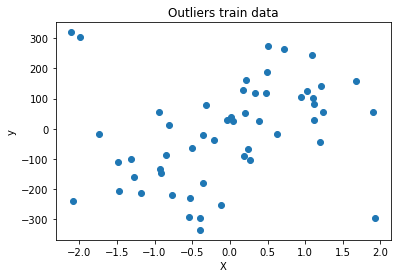

In [21]:
outliers_train = pd.read_csv('data/outliers_train.csv')
X_train = outliers_train['X'].values
X_train = sm.add_constant(X_train)
y_train = outliers_train['Y'].values
plt.scatter(X_train[:, 1], y_train)
plt.title('Outliers train data')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

*What does a visual inspection of training set tell you about the existence of outliers in the data?*
  
The data in general seems to show some kind of linearity, but in the upper-left and lower-right corners there're some observations that seems not to obbey this linearity.

**5.2**

In [22]:
## Code here

OutlierOLSModel = sm.OLS(y_train, X_train)
OutlierOLSModel = OutlierOLSModel.fit()

**5.3**

*You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure ahead of time of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?*
  
Suppose that our dataset has $n$ observations. We want to know how many datasets we can create removing only three points. We can remove the first observation in $n$ different ways. The second observation can be removed in $n - 1$ ways, because the first was already removed. The third one, $n - 2$. There's repetition: if I choose observations $i$, $j$ and $k$, I can choose $j$, $k$ and $i$ too, and they're the same. So each removal of three diferent points repeat $3!$ times, so the real number of different ways to remove three different points is $\dfrac{n (n - 1) (n - 2)}{3!}$. That's the number of linear regressions.


**5.4**

In [23]:
## Code here

def find_outliers_simple(dataset_x, dataset_y):
    n = len(dataset_y)
    sse = np.zeros((n, n, n))
    for i in range(n):
        for j in range(i + 1, n):
            for k in range(j + 1, n):
                X = np.delete(
                    dataset_x.copy(),
                    [i, j, k],
                    axis=0
                )
                y = np.delete(dataset_y.copy(), [i, j, k])
                ls = sm.OLS(y, X)
                ls = ls.fit()
                residuals = np.array(y - ls.predict())
                sse[i, j, k] = np.sum(residuals**2)                
    outlier_indices = np.where(sse == np.min(sse[sse > 0]))
    outlier_indices = [i[0] for i in outlier_indices]
    return outlier_indices

outlier_indices = find_outliers_simple(X_train, y_train)

X_train_no_outliers = np.delete(
    X_train.copy(),
    outlier_indices,
    axis=0
)
y_train_no_outliers = np.delete(
    y_train.copy(),
    outlier_indices
)
OutlierFreeSimpleModel = sm.OLS(
    y_train_no_outliers,
    X_train_no_outliers
)
OutlierFreeSimpleModel = OutlierFreeSimpleModel.fit()

**5.5**

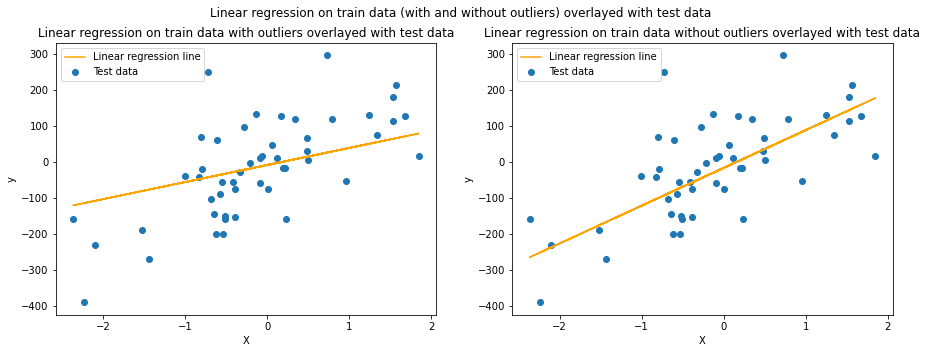

In [24]:
## Code here

outliers_test = pd.read_csv('data/outliers_test.csv')
X_test = outliers_test['X'].values
X_test = sm.add_constant(X_test)
y_test = outliers_test['Y'].values

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

regressor = OutlierOLSModel
#axes[0].scatter(X_train[:, 1], y_train, label='Train data')
axes[0].scatter(X_test[:, 1], y_test, label='Test data')
axes[0].plot(
    X_test[:, 1],
    regressor.predict(X_test),
    label='Linear regression line',
    c='orange'
)
axes[0].set_title('Linear regression on train data '
                  + 'with outliers overlayed with test data')
axes[0].set_xlabel('X')
axes[0].set_ylabel('y')
axes[0].legend()

regressor = OutlierFreeSimpleModel
axes[1].scatter(X_test[:, 1], y_test, label='Test data')
axes[1].plot(
    X_test[:, 1],
    regressor.predict(X_test),
    label='Linear regression line',
    c='orange'
)
axes[1].set_title('Linear regression on train data '
                  + 'without outliers overlayed with'
                  + ' test data')
axes[1].set_xlabel('X')
axes[1].set_ylabel('y')
axes[1].legend()

fig.suptitle('Linear regression on train data (with and'
             + ' without outliers) overlayed with test '
             + 'data')
plt.show()

We can see that the model without outliers fits test data better than the one with outliers.

**5.6**

In [25]:
## Code here

print('R² score on test data:\nOutlierOLSModel:        '
      + '{:.5f}\nOutlierFreeSimpleModel: {:.5f}'.format(
    r2_score(y_test, OutlierOLSModel.predict(X_test)),
    r2_score(y_test, OutlierFreeSimpleModel.predict(X_test))
))

R² score on test data:
OutlierOLSModel:        0.34086
OutlierFreeSimpleModel: 0.45296


Outlier free model produces a better $R^2$ score.

**5.7**

In [26]:
## Code here

def find_outliers_general(
    dataset_x,
    dataset_y,
    tolerance=0.05,
    total_cap=0.1
):
    delta_r2 = 1
    r2_0 = 10
    outlier_indices = []
    while abs(delta_r2) > 0.05 and len(outlier_indices)/len(dataset_y) <= total_cap:
        n = len(dataset_y)
        r2 = np.zeros(n)
        for i in range(n):
            X = np.delete(
                dataset_x.copy(),
                outlier_indices + [i],
                axis=0
            )
            y = np.delete(
                dataset_y.copy(),
                outlier_indices + [i]
            )
            ls = sm.OLS(y, X)
            ls = ls.fit()     
            r2[i] = r2_score(y, ls.predict())
        index = np.where(r2 == np.max(r2))[0][0]
        delta_r2 = r2[index] - r2_0
        r2_0 = r2[index]
        outlier_indices.append(index)
    
    return outlier_indices[:-1]

outlier_indices = find_outliers_general(X_train, y_train)

X_train_no_outliers = np.delete(
    X_train.copy(),
    outlier_indices,
    axis=0
)
y_train_no_outliers = np.delete(
    y_train.copy(),
    outlier_indices
)
OutlierFreeGeneralModel = sm.OLS(
    y_train_no_outliers,
    X_train_no_outliers
)

**5.8**

The outliers are [(-2.11, 320.0), (-1.99, 303.0), (1.93, -297.0)].


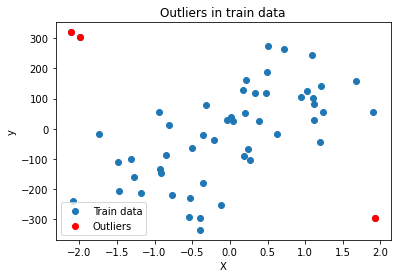

In [27]:
## Code here

OutlierFreeGeneralModel = OutlierFreeGeneralModel.fit()
print('The outliers are {}.'.format([(
    np.round(X_train[i, 1], 2),
    np.round(y_train[i], 2)
) for i in outlier_indices]))
plt.scatter(X_train[:, 1], y_train, label='Train data')
plt.scatter(
    X_train[outlier_indices, 1],
    y_train[outlier_indices],
    c='red',
    label='Outliers'
)
plt.legend()
plt.title('Outliers in train data')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [28]:
# These outliers are the same as in 5.4

outlier_indices == find_outliers_simple(X_train, y_train)

True

In [29]:
# The R² score are the same between General and Simple models
a = r2_score(
    y_test,
    OutlierFreeGeneralModel.predict(X_test)
)
b = r2_score(
    y_test,
    OutlierFreeSimpleModel.predict(X_test)
)

a == b

True

1. *What outliers does it identify?*
    
The outliers are the points in extreme upper-left and extreme lower-right, as can be seen in the last plot.

    
2. *How do those outliers compare to the outliers you found in 5.4?*
    
They're the same, as can be seen in the cells above.

    
3. *How does the general outlier-free Linear Regression model you created in 5.7 perform compared to the simple one in 5.4?*

$R^2$ score are the same, as can be seen in the cells above. So, they perform very similarly.  

---- 


In [30]:
from IPython.core.display import HTML
def css_styling(): styles = open("style/cs109.css", "r").read(); return HTML(styles)
css_styling()